# Importing Libraries

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from skimage.transform import resize
from skimage import io
from skimage.color import rgb2gray,rgba2rgb
import cv2
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

# Investigating the images

In [2]:
os.chdir("images/")

In [3]:
for file in os.listdir():
    img = plt.imread(file)
    print(img.shape)

(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 3)


- We can see that the image size if 3840 x 5120 and each image is an RGB image.
- The images are quite large, hence we need to resize them for faster processing.
- Reducing the size of an images will lead to the loss of some information. However, the information loss shouldn't be important information and as a result we will still manage to utilise the images to solve the puzzle. We should however be cautious in how small we do reduce the images.
- In Lab 3, we utilised images of size 450 x 600 pixels and managed to extract all the relevant features from the images in order to segment the images. Consequently, I believe that at that size, any further features can be appropriately extracted in order to solve the puzzle, and the image is reduced further enough to ensure efficiency in extracting the features.

In [4]:
print(f" We have {len(os.listdir())} images.")

 We have 46 images.


## Re-sizing the images

In [5]:
os.chdir("../")
try:
    os.mkdir("new_images")
    os.chdir("images")
except:
    os.chdir("images")

In [13]:
for image in os.listdir():
    img = plt.imread(image)
    resized = resize(img,(450,600),anti_aliasing=True)
    path = "../new_images/"+image
    plt.imsave(path,resized)

# Investigating the masks

In [15]:
os.chdir("../masks/")
from skimage import io
for file in os.listdir():
    img = io.imread(file)
    print(img.shape)

(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 3)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120)
(3840, 5120)
(3840, 5120, 4)
(3840, 5120, 4)
(3840, 5120, 4)
(3840,

- We can see that the general shape of the masks are 3840 x 5120 pixels. The third dimension implies either we have rgb or rgba models, however since it is a binary image, this does not matter.
- We will however have to however convert the image to gray scale to remove the rgb or rgba channels.
- Since the size is the same as the input image, we can perform the same resizing of the image without losing any important information required to solve the puzzle.

In [16]:
print(f"We have {len(os.listdir())} masks.")

We have 137 masks.


- This makese sense since we have 3 masks from different individuals per image.

## Resizing the masks

In [66]:
os.chdir("../")
try:
    os.mkdir("new_masks")
    os.chdir("masks")
except:
    os.chdir("masks")

In [67]:
for mask in os.listdir():
    img = io.imread(mask)
    resized = resize(img,(450,600),anti_aliasing=True)
    path = "../new_masks/"+mask
    plt.imsave(path,resized,cmap="gray")

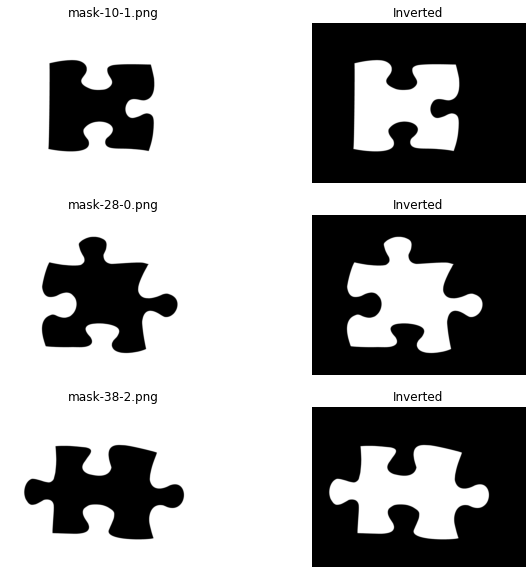

In [68]:
os.chdir("../new_masks/")
inverted = ["mask-10-1.png","mask-28-0.png","mask-38-2.png"]

fig = plt.figure(figsize=(10,10))
i = 1
for inv in inverted:
    img = cv2.imread(inv,0)
    fig.add_subplot(3,2,i)
    plt.title(inv)
    plt.axis('off')
    plt.imshow(img,cmap="gray")
    
    fig.add_subplot(3,2,i+1)
    plt.title("Inverted")
    plt.axis('off')
    new = cv2.bitwise_not(img)
    path = "../new_masks/"+inv
    plt.imsave(path,new,cmap="gray")
    plt.imshow(new,cmap="gray")
    i+=2

plt.savefig("../inverted.png")

- A few masks were inverted. The puzzle was black and the background was white.
- We rectified this as shown in the figure above.

# Inter-rater reliability

- We want to measure the extent to which the 3 individuals that generated the masks agree on what pixels are puzzle pieces and which are background.
- There are 2 stats we use: Cohen's Kappa and Krippendorff’s Alpha.
- Since we have more than 2 raters, we cannot use cohens kappa, but we use fleiss kappa to measure the agreement. It is a generalised form of cohen's kappa allowing more than 2 raters to be compared. It also assumes that the raters were randomly selected.
- Krippendorff’s Alpha

## Fleiss Kappa
- We first need to pass an array in the form: <br>
    rows: represent an individual rater.<br>
    columns: represent a pixel location and the value assigned by the rater.<br>
We pass that into aggregate raters to create a table in the required form to calculate Fleiss's Kappa.

In [201]:
def create_table(masks):
    r,c = np.shape(masks[0])
    if(len(masks)==2):
        result = np.zeros((2,r*c))
        result[0] = masks[0].flatten()
        result[1] = masks[1].flatten()
    else:
        result = np.zeros((3,r*c))
        result[0] = masks[0].flatten()
        result[1] = masks[1].flatten()
        result[2] = masks[2].flatten()
        
    results = result.T
    final = np.zeros((r*c,2))
    for i in range(r*c):
        tmp = results[i]
        v,c = np.unique(tmp,return_counts=True)
        if(len(v)==1 and v[0]==0):
            final[i,0] = c[0]
        elif(len(v)==1 and v[0]==1):
            final[i,1] = c[0]
        else:
            idx1 = np.where(v<=150)
            final[i,0] = np.sum(c[idx1])

            idx2 = np.where(v>=150)
            final[i,1]= np.sum(c[idx2])
    return final,results

In [179]:
def fleiss_kappa_mine(M):
  """
  See `Fleiss' Kappa <https://en.wikipedia.org/wiki/Fleiss%27_kappa>`_.
  :param M: a matrix of shape (:attr:`N`, :attr:`k`) where `N` is the number of subjects and `k` is the number of categories into which assignments are made. `M[i, j]` represent the number of raters who assigned the `i`th subject to the `j`th category.
  :type M: numpy matrix
  """
  N, k = M.shape  # N is # of items, k is # of categories
  n_annotators = float(np.sum(M[0, :]))  # # of annotators

  p = np.sum(M, axis=0) / (N * n_annotators)
  P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
  Pbar = np.sum(P) / N
  PbarE = np.sum(p * p)

  kappa = (Pbar - PbarE) / (1 - PbarE)

  return kappa

In [203]:
df = pd.DataFrame(columns=["Mask","Fleiss Kappa"])
masks = os.listdir()
results = []
for i in range(46):
    m = "mask-"+str(i)
    m1 = m+"-0.png"
    m2 = m+"-1.png"
    m3 = m+"-2.png"
    tmp = [x for x in masks if re.search(m,x) != None  ]
    imgs = [cv2.imread(img,0) for img in tmp]
    table,res = create_table(imgs)
    results.append(res)
    fleiss = fleiss_kappa_mine(table)
    df = df.append({"Mask":m,"Fleiss Kappa":fleiss},ignore_index=True)

In [204]:
df

,Mask,Fleiss Kappa
0,mask-0,0.994332
1,mask-1,0.971781
2,mask-2,0.980728
3,mask-3,0.751374
4,mask-4,0.993802
5,mask-5,0.992485
6,mask-6,0.976068
7,mask-7,0.980328
8,mask-8,0.99028
9,mask-9,0.994931


In [205]:
print(df.to_latex(index=False))

\begin{tabular}{ll}
\toprule
   Mask & Fleiss Kappa \\
\midrule
 mask-0 &     0.994332 \\
 mask-1 &     0.971781 \\
 mask-2 &     0.980728 \\
 mask-3 &     0.751374 \\
 mask-4 &     0.993802 \\
 mask-5 &     0.992485 \\
 mask-6 &     0.976068 \\
 mask-7 &     0.980328 \\
 mask-8 &      0.99028 \\
 mask-9 &     0.994931 \\
mask-10 &     0.996075 \\
mask-11 &     0.990884 \\
mask-12 &     0.982699 \\
mask-13 &     0.994761 \\
mask-14 &     0.965092 \\
mask-15 &     0.987199 \\
mask-16 &     0.984237 \\
mask-17 &     0.990519 \\
mask-18 &     0.989317 \\
mask-19 &      0.99044 \\
mask-20 &     0.948888 \\
mask-21 &     0.984404 \\
mask-22 &     0.958586 \\
mask-23 &     0.995295 \\
mask-24 &     0.980063 \\
mask-25 &     0.988322 \\
mask-26 &     0.991019 \\
mask-27 &     0.995808 \\
mask-28 &     0.991998 \\
mask-29 &      0.99266 \\
mask-30 &     0.992094 \\
mask-31 &     0.994384 \\
mask-32 &     0.992898 \\
mask-33 &     0.972895 \\
mask-34 &     0.990826 \\
mask-35 &     0.996248 \\


In [206]:
print(f"The average Fleiss Kappa is: {df.mean().values}")

The average Fleiss Kappa is: [0.9815557]


## Pearson's Corrleation Coefficient

In [227]:
n = len(results)

df2 = pd.DataFrame(columns = ["Mask","Pearson's Correlation Coefficient"])

for i in range(n):
    tmp = np.corrcoef(results[i].T)
    l = "mask-"+str(i)
    df2 = df2.append({"Mask":l,"Pearson's Correlation Coefficient":np.mean(tmp)},ignore_index =  True)

In [228]:
df2

,Mask,Pearson's Correlation Coefficient
0,mask-0,0.998754
1,mask-1,0.986166
2,mask-2,0.991246
3,mask-3,0.838158
4,mask-4,0.998309
5,mask-5,0.99775
6,mask-6,0.988713
7,mask-7,0.991298
8,mask-8,0.996304
9,mask-9,0.998808


In [229]:
print(f"The average correlation between raters is: {df2.mean().values}")

The average correlation between raters is: [0.99091849]


In [230]:
print(df2.to_latex())

\begin{tabular}{lll}
\toprule
{} &     Mask & Pearson's Correlation Coefficient \\
\midrule
0  &   mask-0 &                          0.998754 \\
1  &   mask-1 &                          0.986166 \\
2  &   mask-2 &                          0.991246 \\
3  &   mask-3 &                          0.838158 \\
4  &   mask-4 &                          0.998309 \\
5  &   mask-5 &                           0.99775 \\
6  &   mask-6 &                          0.988713 \\
7  &   mask-7 &                          0.991298 \\
8  &   mask-8 &                          0.996304 \\
9  &   mask-9 &                          0.998808 \\
10 &  mask-10 &                          0.999475 \\
11 &  mask-11 &                          0.996834 \\
12 &  mask-12 &                          0.992962 \\
13 &  mask-13 &                          0.998898 \\
14 &  mask-14 &                          0.980615 \\
15 &  mask-15 &                          0.995051 \\
16 &  mask-16 &                          0.994932 \\
17 &  m